In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.datasets import make_classification

In [2]:
exec(open("../../header.py").read())

**Description**:

The dataset has a large number of features with some important and some unimportant to the final problem. We use ICE FI to filter to the ICE plots of relevant features instead of visually inspecting them all.

# Import data

In [13]:
x1 = np.random.normal(size = 1000)
x2 = np.random.normal(size = 1000)
x3 = np.random.normal(size = 1000)
x4 = np.random.normal(size = 1000)
y = 10 + x1 * 10 + x2 * 5 + x3 * 6

In [14]:
X = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3})
y = np.array(y)

In [15]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

ridge = Ridge()
ridge.fit(X, y)
ridge.coef_

array([9.989817  , 4.99476808, 5.99403629])

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

gb = GradientBoostingRegressor()
gb.fit(X, ridge.predict(X))

GradientBoostingRegressor()

In [23]:
rt = DecisionTreeRegressor(max_depth = 5)
rt.fit(X, ridge.predict(X))

DecisionTreeRegressor(max_depth=5)

# comparator

In [17]:
shapley = SHAP_FI("tree")
native = Native_FI()
ice = ICE("continuous")
pfi = PFI_FI(y)

fi_metrics = [ice, native, shapley, pfi]

In [18]:
comparator = Comparator(trace = True)
comparator.fit(X, gb, fi_metrics)

Fitting for <__main__.ICE object at 0x0000025AD2270A90>
Fitting for <__main__.Native_FI object at 0x0000025AD22708E0>
Fitting for <__main__.SHAP_FI object at 0x0000025AD2270970>
Fitting for <__main__.PFI_FI object at 0x0000025AD2270B20>
PFI fits in 0.08 seconds


In [19]:
comparator.build_normalized_table()

,Feature,ICE FI,ICE In-Dist FI,Native Feature Importance,Shapley Value,PFI
0,x1,85.518596,86.333712,63.140042,50.000000,64.790167
1,x2,6.176173,6.002764,14.684069,1.131297,14.289491
2,x3,8.305231,7.663524,22.175889,48.868703,20.920342


In [24]:
shapley = SHAP_FI("tree")
native = Native_FI()
ice = ICE("continuous")
pfi = PFI_FI(y)

fi_metrics = [ice, native, shapley, pfi]

In [25]:
comparator = Comparator(trace = True)
comparator.fit(X, rt, fi_metrics)

Fitting for <__main__.ICE object at 0x0000025AD22661F0>
Fitting for <__main__.Native_FI object at 0x0000025AD2266160>
Fitting for <__main__.SHAP_FI object at 0x0000025AD2266C40>
Fitting for <__main__.PFI_FI object at 0x0000025AD2266220>
PFI fits in 0.05 seconds


In [26]:
comparator.build_normalized_table()

,Feature,ICE FI,ICE In-Dist FI,Native Feature Importance,Shapley Value,PFI
0,x1,80.097426,79.618209,67.928685,50.000000,69.164667
1,x2,8.115039,8.384951,11.494620,16.744168,11.451675
2,x3,11.787535,11.996841,20.576695,33.255832,19.383658


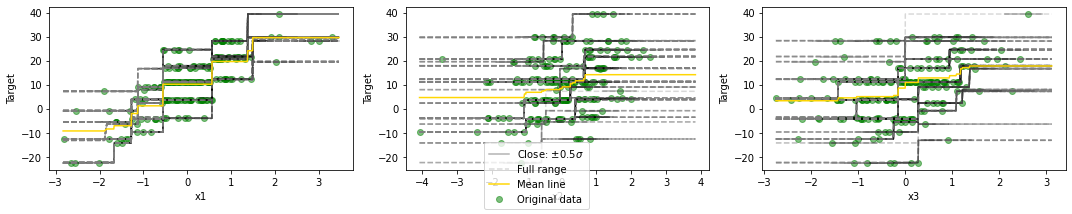

In [27]:
ice.ice_plot()

# Save data

In [12]:
folder_name = 'large_feature_set'

In [13]:
try:
    os.mkdir(processed_root(folder_name))
except FileExistsError:
    print("Folder already exists")

Folder already exists


In [14]:
X.to_csv(processed_root(f"{folder_name}/X.csv"), index = False)
y.to_csv(processed_root(f"{folder_name}/y.csv"), index = False)